# Collaborative Based
developer: Mohammad mehdi Sahraei
***
[maktabkhooneh](https://maktabkhooneh.org/course/%DB%8C%D8%A7%D8%AF%DA%AF%DB%8C%D8%B1%DB%8C-%D9%85%D8%A7%D8%B4%DB%8C%D9%86-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-mk1318/)



## importing_libraries


In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the data with pandas


In [2]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## cleaning data
### removing the year from the title column and replacing and storing in a new year column.
- we should use regex or regular expressions to extracting year


In [3]:
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False) #extracting using by regex
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False) #Removing the parentheses
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '') #Removing the years from the 'title' column
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip()) #to get rid of any ending whitespace characters

/tmp/ipykernel_6678/2936267768.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '') #Removing the years from the 'title' column


In [4]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


- Dropping te genres column

In [5]:
movies_df = movies_df.drop('genres', axis='columns')

In [6]:
movies_df.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


<br>


- ratings dataframe

In [7]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


- Dropping te timestamp column

In [8]:
ratings_df = ratings_df.drop('timestamp', axis='columns')

In [9]:
ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [10]:
!wc -l movies.csv

9743 movies.csv


### data histogram

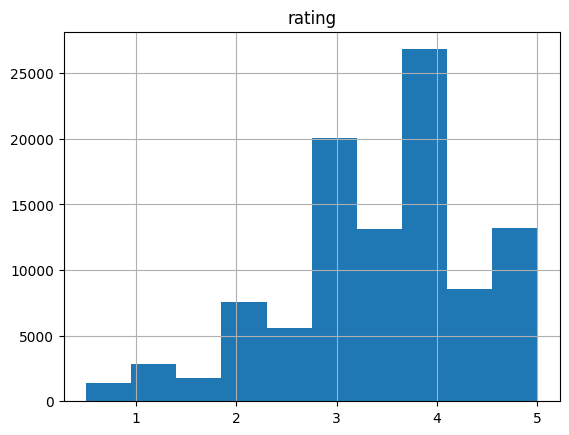

In [11]:
df_hist = ratings_df[['rating']]
df_hist.hist()
plt.show()

# Collaborative-recommender

**Types:**

- 1-User Filtering
- 2-item Filtering

***

There are several methods of finding similar users
- **Pearson Correlation Function**
- **Euclidean**
- and etc

### User Filtering

- #### creating an input user to recommend movies

In [12]:
userInput = [
              {'title':'Toy Story', 'rating':3.5},
              {'title':'Jumanji', 'rating':2},
              {'title':"Pulp Fiction", 'rating':5},
              {'title':'Akira', 'rating':4.5}
         ] 

inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,Toy Story,3.5
1,Jumanji,2.0
2,Pulp Fiction,5.0
3,Akira,4.5


- #### adding movieId to input user


In [13]:
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
inputMovies = pd.merge(inputId, inputMovies)
inputMovies = inputMovies.drop('year', axis='columns') #Dropping information

inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5


- #### obtaining Values of Users (in fact We have the same values)

In [14]:
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head(10)

,userId,movieId,rating
0,1,1,4.0
16,1,296,3.0
320,4,296,1.0
516,5,1,4.0
533,5,296,5.0
560,6,2,4.0
692,6,296,2.0
874,7,1,4.5
1026,8,2,4.0
1049,8,296,4.0


In [15]:
userSubset.shape

(671, 3)

tip: well we have both information about input user and other users

#### groupby

In [16]:
userSubsetGroup = userSubset.groupby(['userId'])

In [17]:
userSubsetGroup.get_group(122)

,userId,movieId,rating
18831,122,2,4.0
18845,122,296,5.0


#### Sorting users
- tip: key = logic ->  lambda x: len(x[1]) causes the users who have more shared videos to be displayed first and the ones with the least ones are placed at the end of the list

In [18]:
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
userSubsetGroup[1:3]

/tmp/ipykernel_6678/588133235.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)


[(177,
         userId  movieId  rating
  24900     177        1     5.0
  24901     177        2     3.5
  24930     177      296     5.0
  25069     177     1274     2.0),
 (219,
         userId  movieId  rating
  31524     219        1     3.5
  31525     219        2     2.5
  31554     219      296     4.0
  31628     219     1274     2.5)]

### Obtaining Similarity of users to input user

- Pearson Correlation Coefficient:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")


#### Then we get the similarity according to 100 users

In [19]:
userSubsetGroup = userSubsetGroup[0:100]

## Pearson Correlation
Similarity input user to  whole users

In [20]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [21]:
# for example Similarity input user to 75 user is 0.8017837257372732
pearsonCorrelationDict

{91: 0.9221388919541469,
 177: 0.0657951694959769,
 219: 0.5459486832355505,
 274: 0.8510644963469901,
 298: 0.9883173560569456,
 414: 0.9258200997725514,
 434: 0.9864036607532465,
 474: 0.0657951694959769,
 477: 0.7237468644557459,
 480: 0.8728715609439696,
 483: 0.35043832202523123,
 599: 0.9341484842923421,
 600: 0.18442777839082938,
 608: 0.9378934722869389,
 18: 1.0,
 21: 0,
 50: 0.9449111825230734,
 57: -0.9449111825230682,
 68: -0.8660254037844356,
 103: 0.8660254037844402,
 107: -1.0,
 135: 0.8660254037844402,
 140: 0.5,
 144: 1.0,
 153: 0.8660254037844379,
 160: 0.8660254037844402,
 182: 0.9449111825230684,
 202: 0,
 217: 0.0,
 226: 0.9819805060619667,
 232: 0.6546536707079778,
 240: -0.8660254037844386,
 249: 0,
 288: 0.9332565252573829,
 304: 0.8660254037844356,
 307: 0.9607689228305233,
 318: 0.88249750329277,
 322: 0.9607689228305233,
 323: 0.0,
 330: 0.8660254037844386,
 353: 0.8660254037844356,
 357: 0.7205766921228925,
 359: 0.8660254037844448,
 372: 0.142857142857144,


#### converting dict to dataframe

In [22]:
#orient: The from_dict() function is used to construct DataFrame from dict of array-like or dicts
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.922139,91
1,0.065795,177
2,0.545949,219
3,0.851064,274
4,0.988317,298


#### most similar

In [23]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head(5)

,similarityIndex,userId
72,1.0,33
14,1.0,18
88,1.0,112
90,1.0,119
87,1.0,105


#### Rating of selected users to all movies
- left_on: Column or index level names to join on in the left DataFrame
- right_on: Column or index level names to join on in the right DataFrame
- left_index: Use the index from the left DataFrame as the join key(s)
- right_index: Use the index from the right DataFrame as the join key

In [24]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')

In [25]:
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,33,1,3.0
1,1.0,33,7,1.0
2,1.0,33,11,2.0
3,1.0,33,17,4.0
4,1.0,33,21,4.0


### weightedRating =  Multiplying the similarity by the user's ratings

In [26]:
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head(50)

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,33,1,3.0,3.0
1,1.0,33,7,1.0,1.0
2,1.0,33,11,2.0,2.0
3,1.0,33,17,4.0,4.0
4,1.0,33,21,4.0,4.0
5,1.0,33,25,3.0,3.0
6,1.0,33,28,5.0,5.0
7,1.0,33,32,3.0,3.0
8,1.0,33,34,3.0,3.0
9,1.0,33,36,5.0,5.0


#### we should obtain the sum of [similarityIndex] , [weightedRating]
- each films

In [27]:
set_group = topUsersRating.groupby('movieId')
set_group.get_group(5)[:3]

,similarityIndex,userId,movieId,rating,weightedRating
2250,1.0,66,5,4.0,4.0
3883,1.0,117,5,3.0,3.0
4987,1.0,45,5,3.0,3.0


In [28]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,41.894371,144.593560
2,28.907889,84.133978
3,14.161698,43.039994
5,9.283947,26.898021
6,18.893662,74.664086


## final outcome

In [29]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.index = range(len(recommendation_df)) #indexing anew

recommendation_df.head()

,weighted average recommendation score,movieId
0,3.451384,1
1,2.910416,2
2,3.039183,3
3,2.897261,5
4,3.951806,6


Now let's sort it and see the top 20 movies that the algorithm recommended!


In [30]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(1)

,weighted average recommendation score,movieId
6328,5.0,138966


#### groupby

In [31]:
set_group = movies_df.groupby('movieId')
set_group.get_group(138966)[:]

,movieId,title,year
8986,138966,Nasu: Summer in Andalusia,2003


#### another way

In [32]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
251,290,Once Were Warriors,1994
993,1295,"Unbearable Lightness of Being, The",1988
4108,5888,Brother (Brat),1997
7917,95311,Presto,2008
7934,95654,Geri's Game,1997
8986,138966,Nasu: Summer in Andalusia,2003
9317,159811,The Bremen Town Musicians,1969
9540,172589,Winter in Prostokvashino,1984
9541,172591,The Godfather Trilogy: 1972-1990,1992
9542,172637,Priklyucheniya Kapitana Vrungelya,1979


##### visual

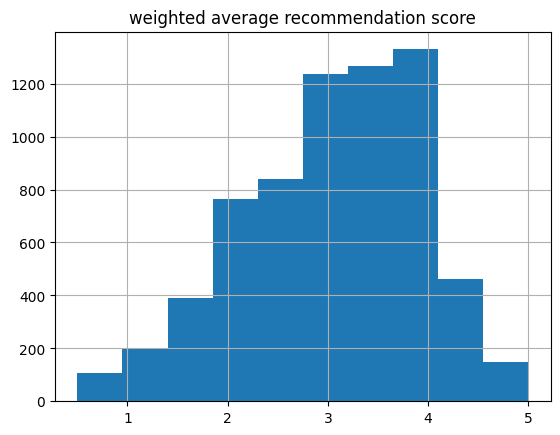

In [33]:
df_ = recommendation_df[['weighted average recommendation score']]
df_.hist()
plt.show()

/tmp/ipykernel_6678/2979086106.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.swarmplot(df_['weighted average recommendation score'][:50])


<AxesSubplot: ylabel='weighted average recommendation score'>

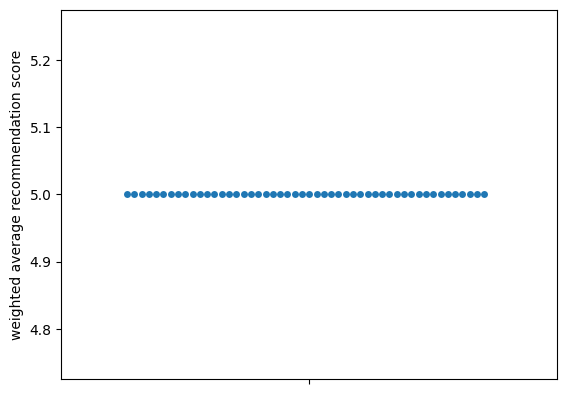

In [34]:
sns.swarmplot(df_['weighted average recommendation score'][:50])

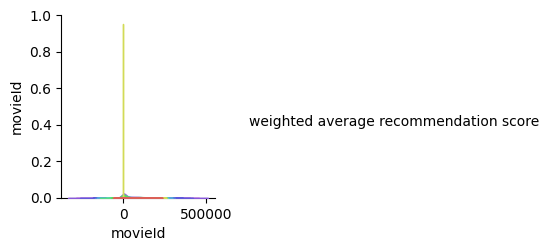

In [35]:
sns.pairplot(data = recommendation_df,hue='weighted average recommendation score',palette='hls', plot_kws={'s':80})
plt.show()

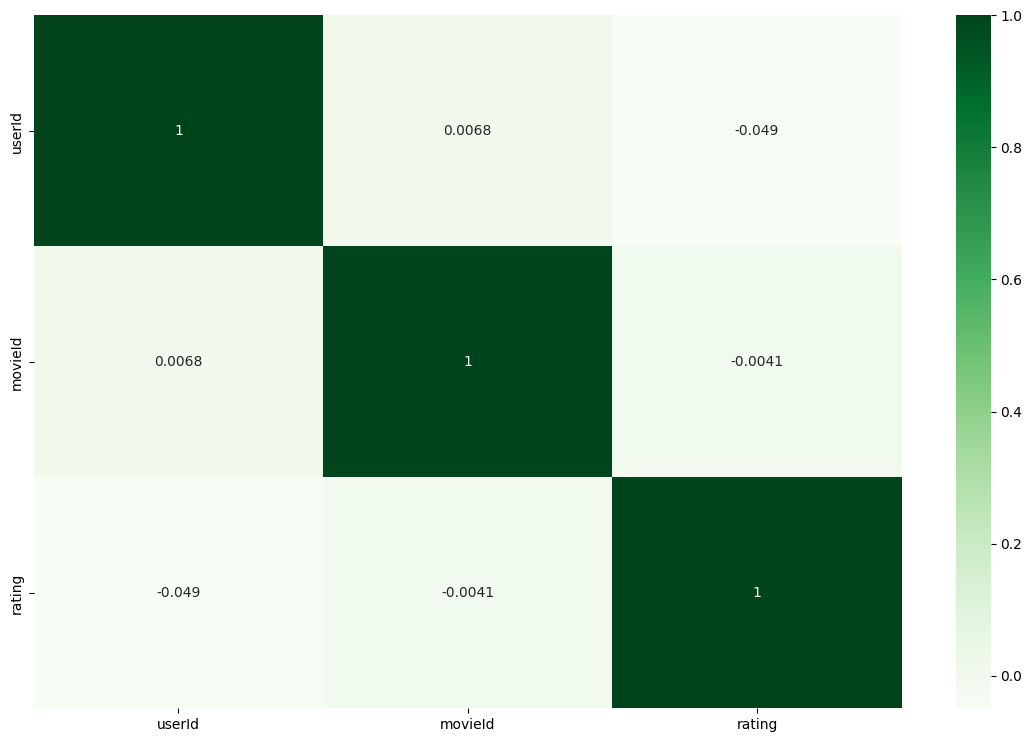

In [37]:
plt.figure(figsize=(14,9))
sns.heatmap(ratings_df.corr(),cbar=True,annot=True,cmap='Greens')
plt.show()